In [1]:
import numpy as np
import deepmatching as dm
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.patches import ConnectionPatch
from skimage.transform import rescale, resize, downscale_local_mean, rotate
from PIL import Image

# Match

In [2]:
img1 = cv.imread('/home/mirlab/Workspace/SheetSync/noteheadDetector/score_data/prepped_png/score1.png', 0)
img2 = cv.imread('/home/mirlab/Workspace/SheetSync/bms-dtw-annotations/score1.jpg', 0)

In [3]:
_, img1 = cv.threshold(img1,127,255,cv.THRESH_BINARY)
_, img2 = cv.threshold(img2,127,255,cv.THRESH_BINARY)

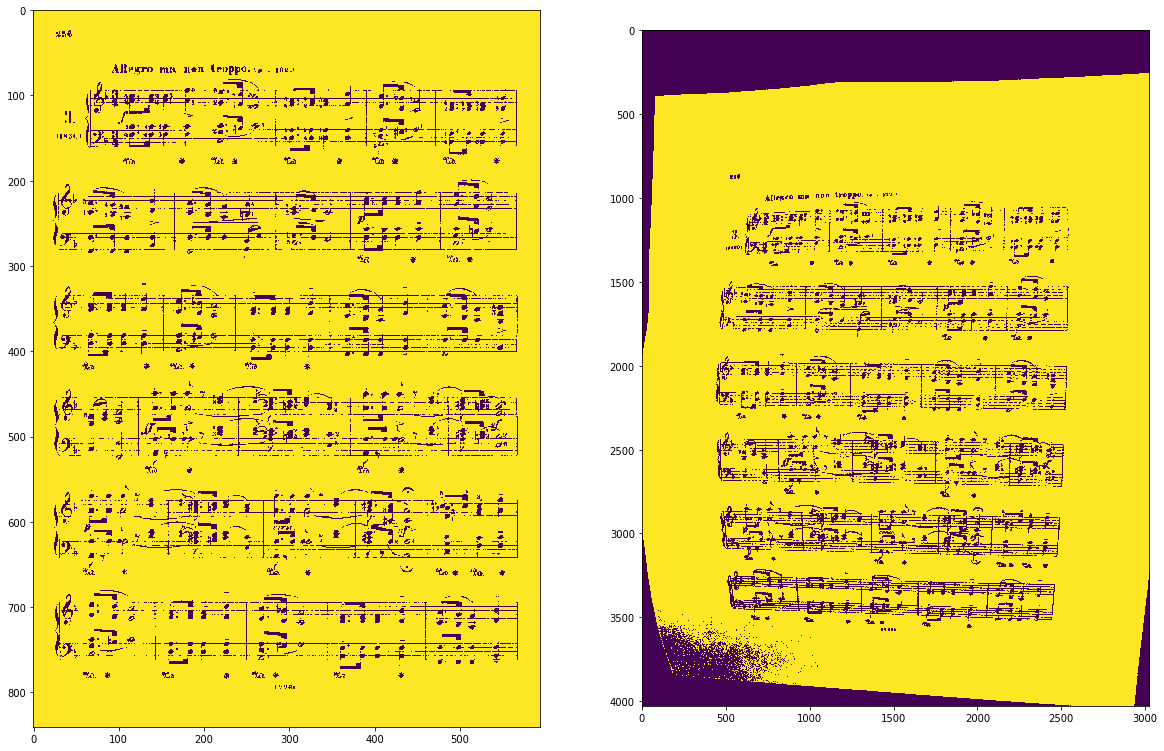

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

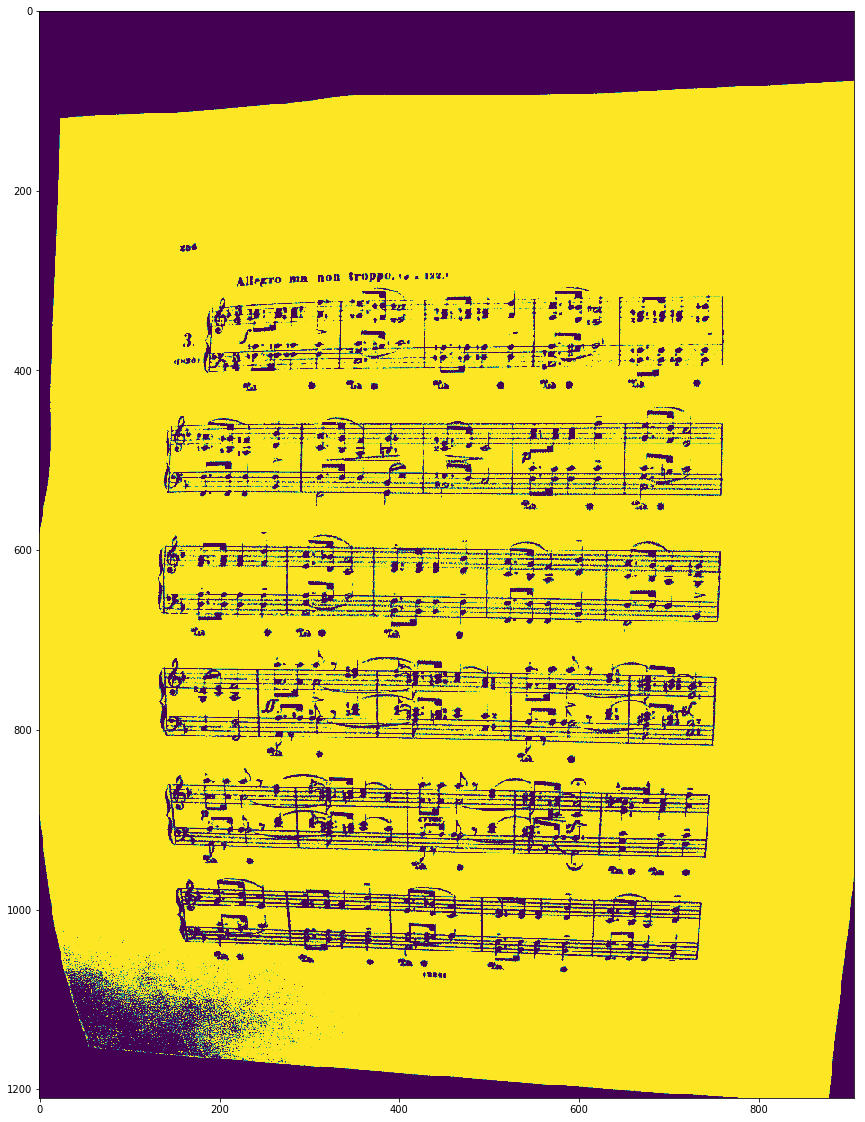

In [5]:
img2_resize = cv.resize(img2, (0,0), fx=0.3, fy=0.3)
plt.figure(figsize=(20,20))
plt.imshow(img2_resize)

In [6]:
img1_new = cv.cvtColor(img1, cv.COLOR_GRAY2RGB)
img2_new = cv.cvtColor(img2_resize, cv.COLOR_GRAY2RGB)

In [7]:
matches = dm.deepmatching( img1_new, img2_new, '-downscale 2 -v' )

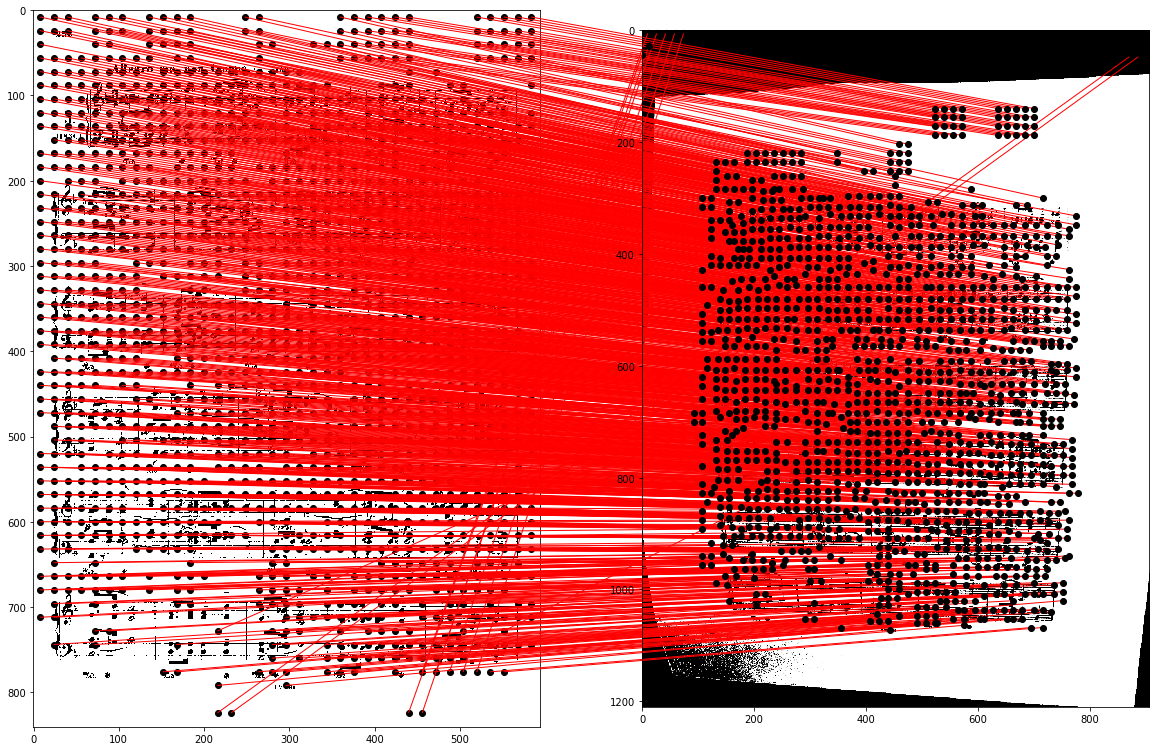

In [8]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1_new)
for i in range(len(matches)):
    ax1.plot([matches[i][0]], [matches[i][1]], 'ko')
           
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2_new)
for i in range(len(matches)):
    ax2.plot([matches[i][2]], [matches[i][3]], 'ko')

for i in range(len(matches)):
    con = ConnectionPatch(xyA=(matches[i][2], matches[i][3]), coordsA='data', coordsB='data',
                          xyB=(matches[i][0], matches[i][1]), axesA=ax2, axesB=ax1, color='red')
    ax2.add_artist(con)

In [9]:
matches

array([[   8.       ,    8.       ,  132.       ,  236.       ,
           5.5646343,   72.       ],
       [   8.       ,  520.       ,  108.       ,  780.       ,
           5.203855 , 1530.       ],
       [   8.       ,  536.       ,  108.       ,  812.       ,
           5.2236376, 1556.       ],
       ...,
       [ 504.       ,  120.       ,  684.       ,  348.       ,
           5.204067 ,  251.       ],
       [ 504.       ,  488.       ,  676.       ,  776.       ,
           5.143451 ,  833.       ],
       [ 504.       ,  504.       ,  676.       ,  796.       ,
           5.0998344,  982.       ]], dtype=float32)

# Non-match

In [10]:
img1 = cv.imread('/home/mirlab/Workspace/SheetSync/noteheadDetector/score_data/prepped_png/score1.png', 0)
img2 = cv.imread('/home/mirlab/Workspace/SheetSync/bms-dtw-annotations/score4.jpg', 0)

In [11]:
_, img1 = cv.threshold(img1,127,255,cv.THRESH_BINARY)
_, img2 = cv.threshold(img2,127,255,cv.THRESH_BINARY)

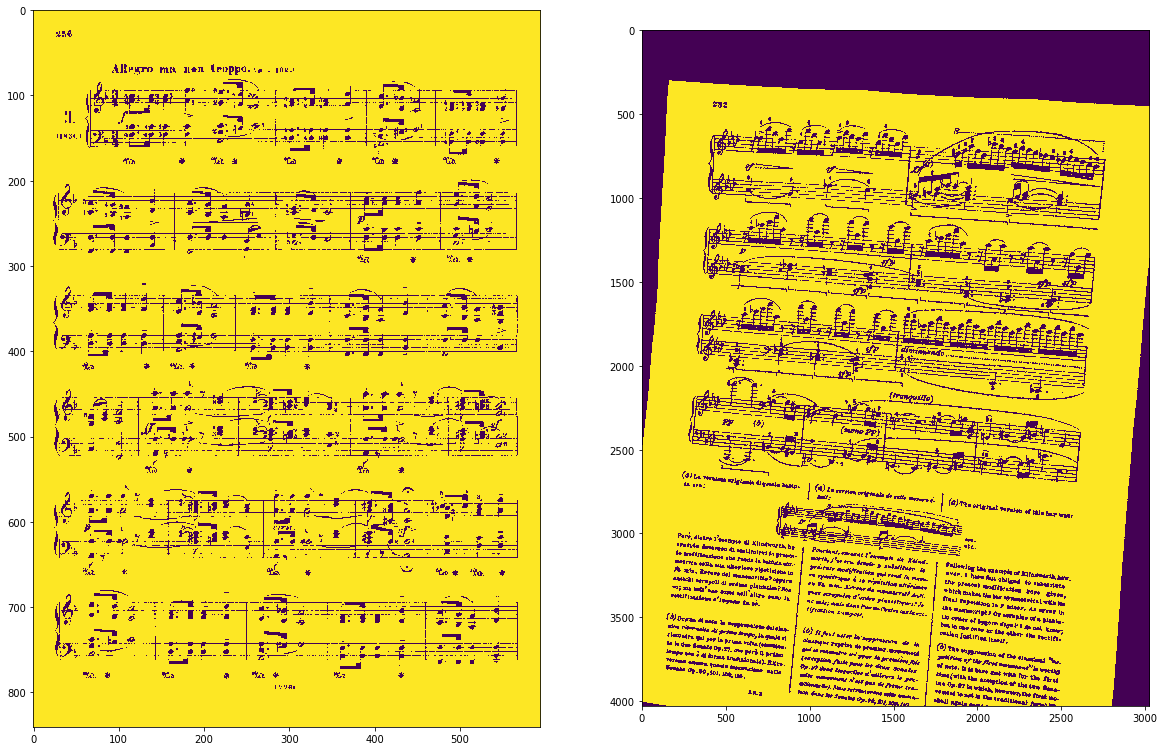

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

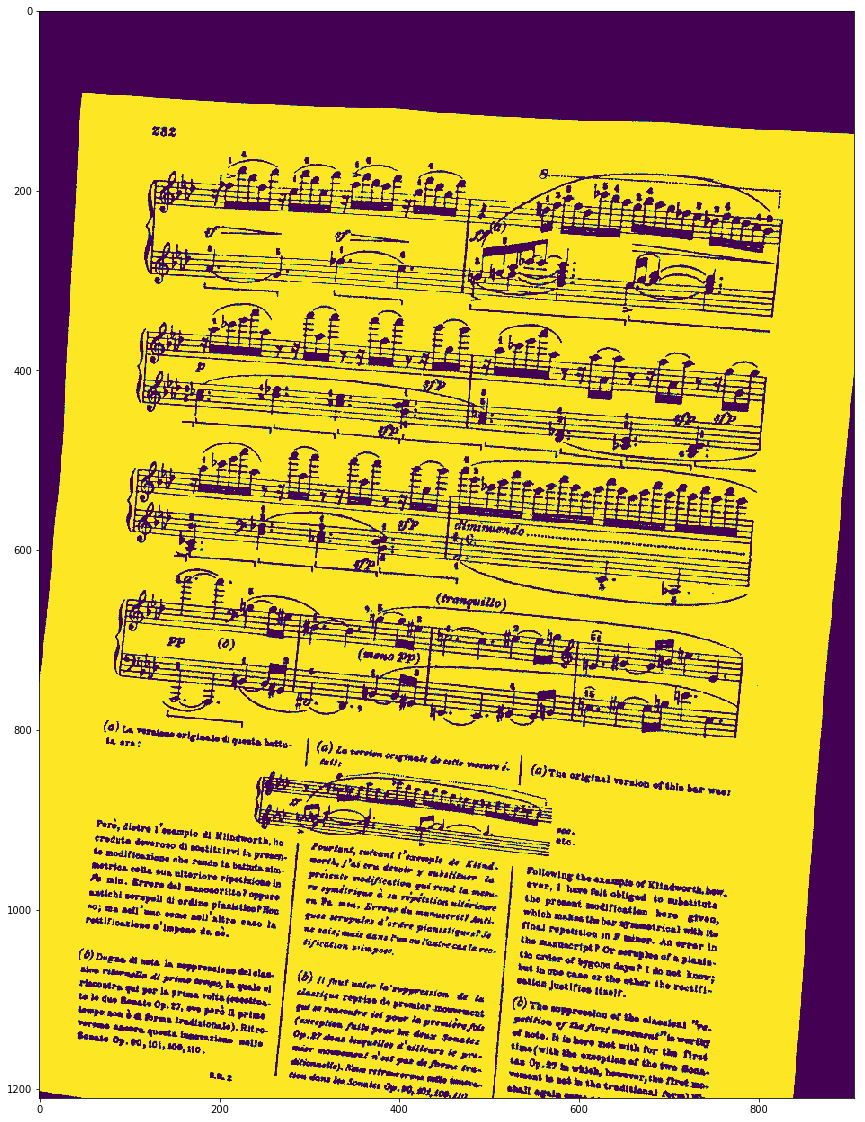

In [13]:
img2_resize = cv.resize(img2, (0,0), fx=0.3, fy=0.3)
plt.figure(figsize=(20,20))
plt.imshow(img2_resize)

In [14]:
img1_new = cv.cvtColor(img1, cv.COLOR_GRAY2RGB)
img2_new = cv.cvtColor(img2_resize, cv.COLOR_GRAY2RGB)

In [15]:
matches = dm.deepmatching( img1_new, img2_new, '-downscale 2 -v' )

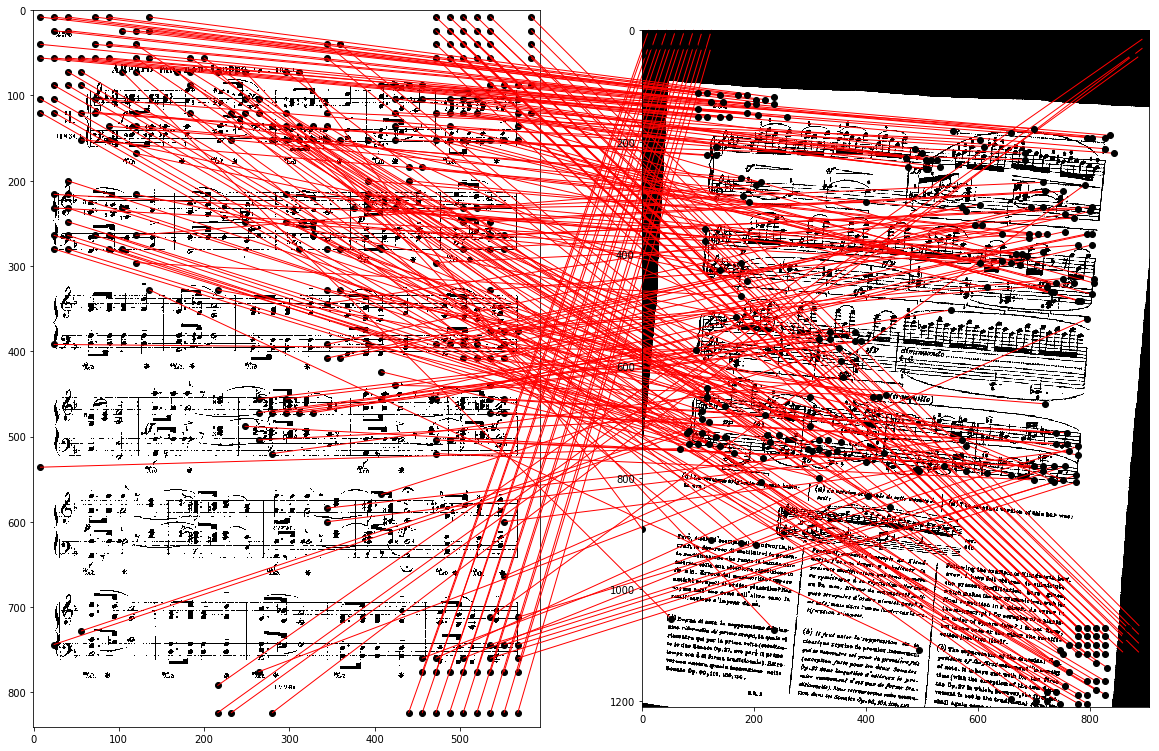

In [16]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1_new)
for i in range(len(matches)):
    ax1.plot([matches[i][0]], [matches[i][1]], 'ko')
           
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2_new)
for i in range(len(matches)):
    ax2.plot([matches[i][2]], [matches[i][3]], 'ko')

for i in range(len(matches)):
    con = ConnectionPatch(xyA=(matches[i][2], matches[i][3]), coordsA='data', coordsB='data',
                          xyB=(matches[i][0], matches[i][1]), axesA=ax2, axesB=ax1, color='red')
    ax2.add_artist(con)

In [17]:
matches

array([[8.0000000e+00, 8.0000000e+00, 1.0000000e+02, 1.1200000e+02,
        5.0728302e+00, 6.9200000e+02],
       [8.0000000e+00, 5.3600000e+02, 6.8000000e+01, 7.4800000e+02,
        4.5914316e+00, 8.6280000e+03],
       [8.0000000e+00, 4.0000000e+01, 1.0000000e+02, 1.4000000e+02,
        5.0709615e+00, 6.9200000e+02],
       ...,
       [5.0400000e+02, 4.0800000e+02, 7.2000000e+02, 6.6800000e+02,
        4.3854003e+00, 6.4540000e+03],
       [5.0400000e+02, 1.0400000e+02, 5.0800000e+02, 2.3200000e+02,
        4.7001457e+00, 1.0060000e+03],
       [5.0400000e+02, 1.2000000e+02, 5.1200000e+02, 2.4800000e+02,
        4.6016526e+00, 1.0060000e+03]], dtype=float32)